In [1]:
%matplotlib inline

import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, v_measure_score

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from yellowbrick.cluster import KElbowVisualizer

from mpl_toolkits.mplot3d.axes3d import Axes3D

sns.set()

/Users/lescobar/.anaconda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Load Dataset <a id='load_dataset'></a>

In [3]:
data_frame = pd.read_csv('data/standscaler_pca_dataset.csv', index_col='patient_id')
data_frame.head()

,0,1,2,3,4,5,6,7,8
patient_id,,,,,,,,,
30,-2.478791,2.649604,0.488594,0.419761,-0.031517,-0.511156,0.071723,0.128733,-0.030674
31,2.116902,1.004163,-1.853525,-0.991107,-0.434996,-0.208806,-0.123282,0.020825,0.017553
32,-0.210183,1.198085,1.115644,-1.703688,-1.299281,-0.615108,0.088660,0.000525,0.014903
33,2.800917,-0.539468,1.120618,0.278740,1.013441,0.358727,-0.006748,0.139920,0.001666
34,-0.898801,1.077639,1.435869,1.271747,1.475563,0.585640,-0.116957,-0.093494,-0.019865


# Deteriminar numero de clusters

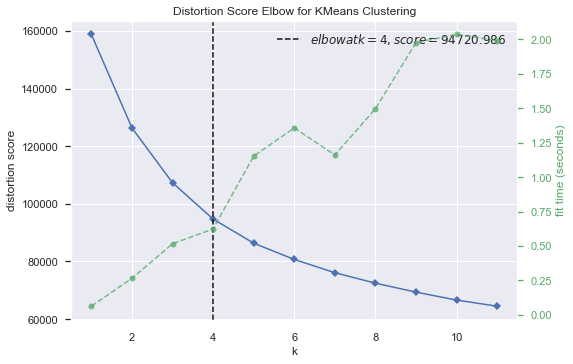

In [5]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(data_frame)        # Fit the data to the visualizer
_ = visualizer.poof() # Draw/show/poof the data

# KMeans con 4 grupos

In [6]:
model_stand_KMeans_4 = KMeans(4, max_iter=50000)
model_stand_KMeans_4.fit(data_frame)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

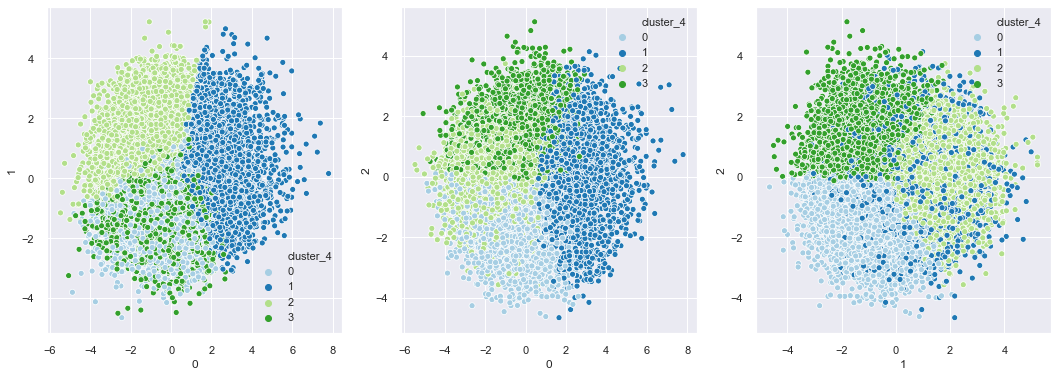

In [10]:
data_frame['cluster_4'] = model_stand_KMeans_4.labels_
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(18,6))
_ = sns.scatterplot('0','1', data=data_frame, hue='cluster_4', palette='Paired', ax=axes[0])
_ = sns.scatterplot('0','2', data=data_frame, hue='cluster_4', palette='Paired', ax=axes[1])
_ = sns.scatterplot('1','2', data=data_frame, hue='cluster_4', palette='Paired', ax=axes[2])